In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pnevmoniya/sample_solution.csv
/kaggle/input/pnevmoniya/test/test_img_10340.jpeg
/kaggle/input/pnevmoniya/test/test_img_10168.jpeg
/kaggle/input/pnevmoniya/test/test_img_10613.jpeg
/kaggle/input/pnevmoniya/test/test_img_10368.jpeg
/kaggle/input/pnevmoniya/test/test_img_10036.jpeg
/kaggle/input/pnevmoniya/test/test_img_10527.jpeg
/kaggle/input/pnevmoniya/test/test_img_10020.jpeg
/kaggle/input/pnevmoniya/test/test_img_10585.jpeg
/kaggle/input/pnevmoniya/test/test_img_10276.jpeg
/kaggle/input/pnevmoniya/test/test_img_10054.jpeg
/kaggle/input/pnevmoniya/test/test_img_10298.jpeg
/kaggle/input/pnevmoniya/test/test_img_10355.jpeg
/kaggle/input/pnevmoniya/test/test_img_10511.jpeg
/kaggle/input/pnevmoniya/test/test_img_10410.jpeg
/kaggle/input/pnevmoniya/test/test_img_10096.jpeg
/kaggle/input/pnevmoniya/test/test_img_10219.jpeg
/kaggle/input/pnevmoniya/test/test_img_10057.jpeg
/kaggle/input/pnevmoniya/test/test_img_10296.jpeg
/kaggle/input/pnevmoniya/test/test_img_10407.jpeg
/kagg

In [2]:
import fastai
import torch

from fastai.vision.all import *
from ipywidgets import widgets
import cv2 as cv

# **Loading Train Data**

In [3]:
path = Path("/kaggle/input/pnevmoniya/train")
path.ls()

(#2) [Path('/kaggle/input/pnevmoniya/train/PNEUMONIA'),Path('/kaggle/input/pnevmoniya/train/NORMAL')]

In [4]:
pnevmoniya_DBlack = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2 , seed=18),
    get_y = parent_label,
    item_tfms=Resize(224)
)

In [5]:
dls = pnevmoniya_DBlack.dataloaders(path)

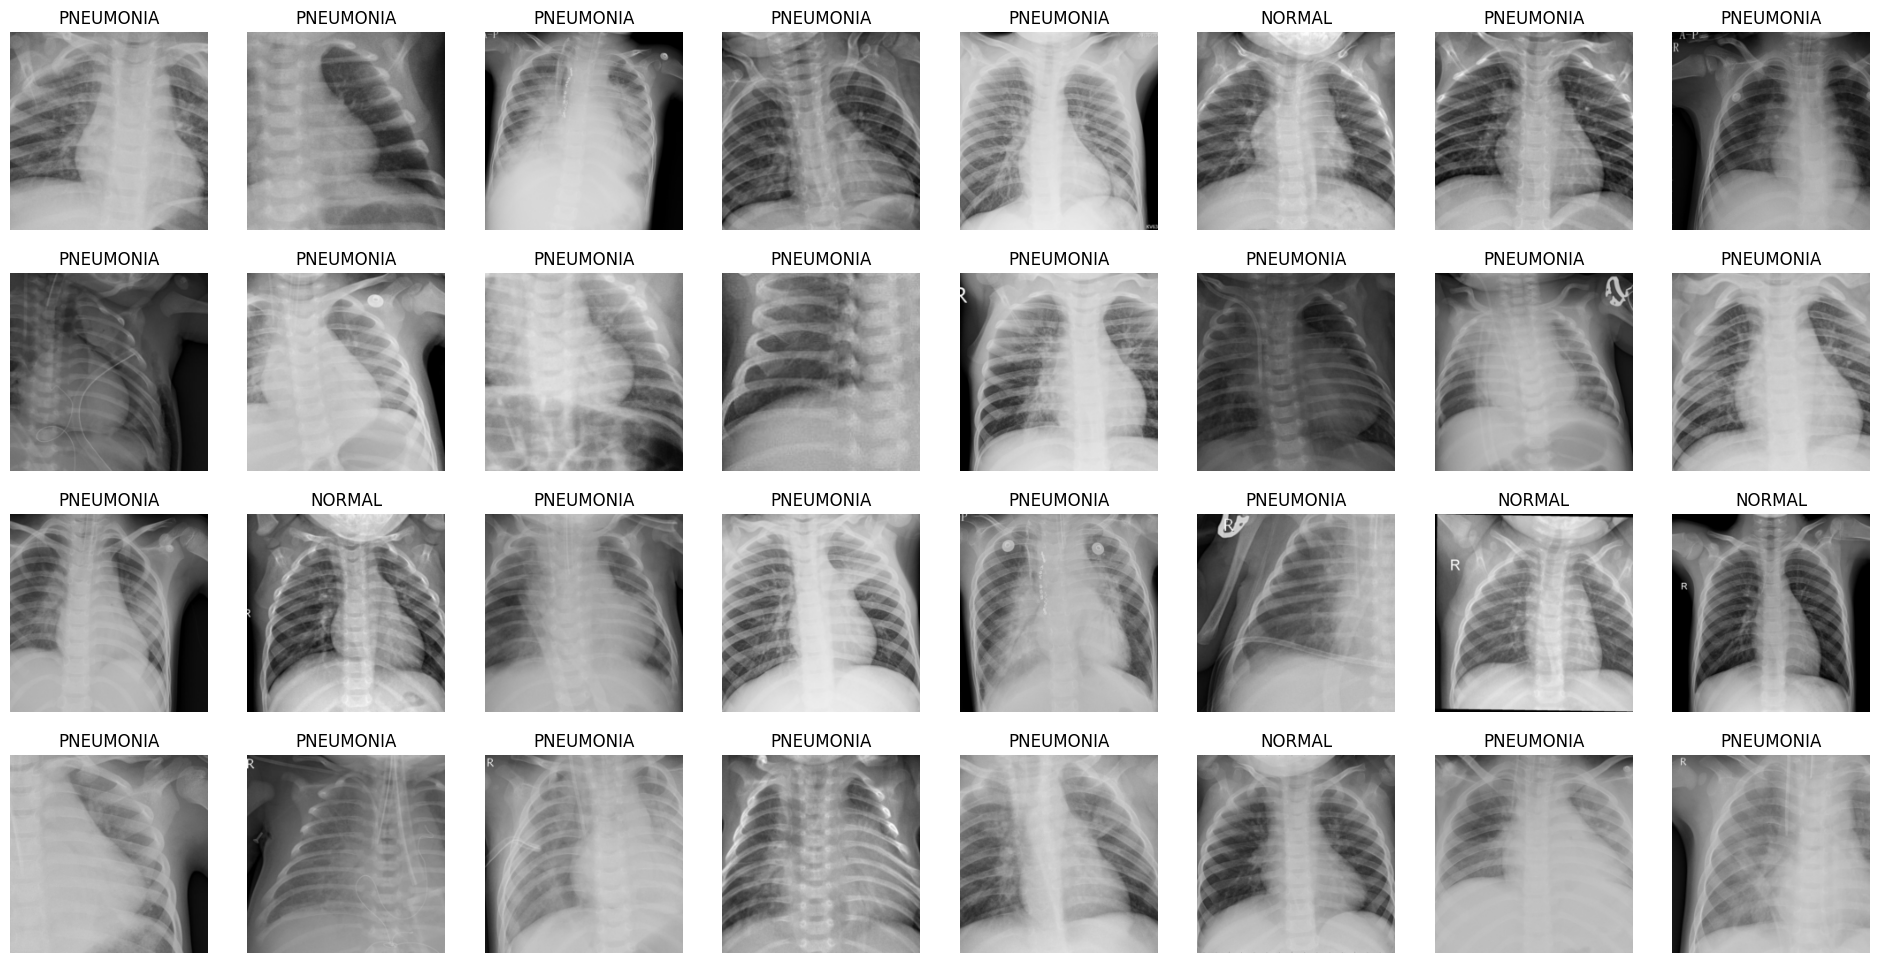

In [6]:
dls.train.show_batch(max_n=32, nrows=4)

In [7]:
learn = vision_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(10)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 152MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.487233,0.168999,0.948226,00:54


epoch,train_loss,valid_loss,accuracy,time
0,0.177767,0.071674,0.975072,00:54
1,0.100577,0.063744,0.987536,00:55
2,0.059414,0.077242,0.986577,00:56
3,0.064475,0.068178,0.984660,00:56
4,0.042023,0.092616,0.986577,00:55
5,0.033558,0.048046,0.985618,00:55
6,0.020847,0.051289,0.990412,00:55
7,0.012938,0.036519,0.992330,00:54
8,0.006878,0.031490,0.991371,00:55
9,0.005678,0.030277,0.991371,00:55


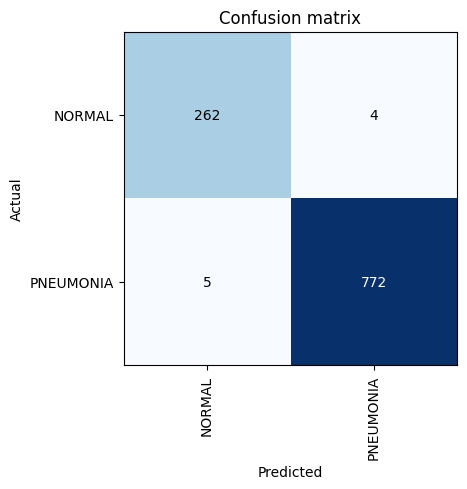

In [8]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

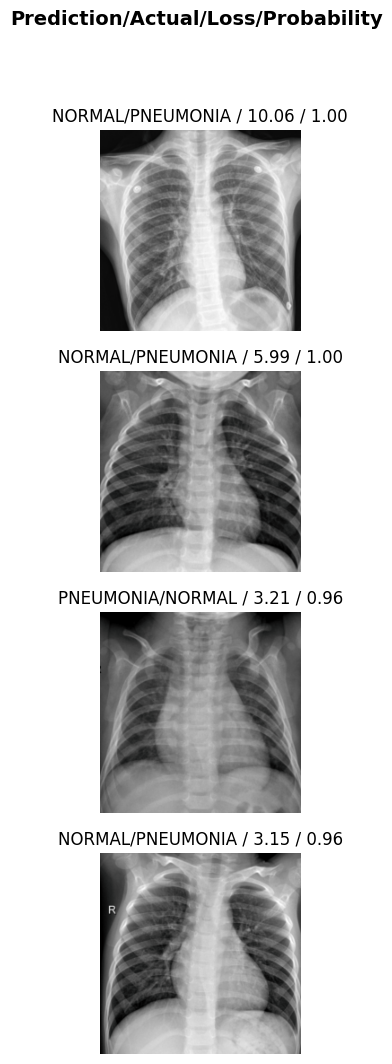

In [9]:
interp.plot_top_losses(4, nrows=4)

# **Loading test data**

In [10]:
df_s = pd.read_csv('../input/pnevmoniya/sample_solution.csv')
df_s.head()

,id,labels
0,test_img_10001.jpeg,0
1,test_img_10002.jpeg,0
2,test_img_10003.jpeg,0
3,test_img_10004.jpeg,0
4,test_img_10005.jpeg,0


In [11]:
for i in range(0,624):
    label = df_s.iloc[i,0]
    img = cv.imread('../input/pnevmoniya/test/'+label)
    pred, _, prob = learn.predict(img)
    if(pred=='PNEUMONIA'):
        df_s.iloc[i,1]=1
    else :df_s.iloc[i,1]=0  

**Submission**

In [12]:
df_s

,id,labels
0,test_img_10001.jpeg,1
1,test_img_10002.jpeg,0
2,test_img_10003.jpeg,1
3,test_img_10004.jpeg,1
4,test_img_10005.jpeg,0
...,...,...
619,test_img_10620.jpeg,1
620,test_img_10621.jpeg,0
621,test_img_10622.jpeg,1
622,test_img_10623.jpeg,1


In [13]:
df_s.to_csv('submission.csv',index=False)